In [2]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
%matplotlib inline

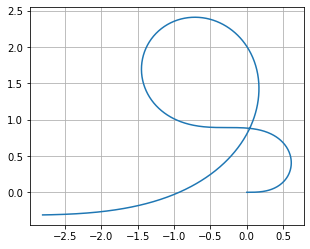

At s=10, {x, y] = -2.81, -0.31


In [30]:
#a.(i) Plotting curve
from scipy.integrate import simps
theta = lambda u:np.pi*np.sin(np.log(1+u**2))
xs = lambda s:np.cos(theta(s))
ys = lambda s:np.sin(theta(s))
u = np.arange(0,10,0.01)
x = cumtrapz(xs(u),u,initial=0)
y = cumtrapz(ys(u),u,initial=0)
x10 = np.trapz(xs(u),u)
y10 = np.trapz(ys(u),u)
plt.plot(x,y)
plt.grid()
plt.gca().set_aspect(1.0)
plt.show()
print("At s=10, {x, y] = %.2f, %.2f" % (x10, y10))


In [49]:
# (ii) Curvature at s = 5

k = np.arange(1, 5) # creating values for h
s = 5
h = 0.01 / 10**(k)
h_arr = [[]]
for i in h:
    dxds = (xs(s+i)-xs(s-i))/(2*i)
    dyds = (ys(s+i)-ys(s-i))/(2*i)
    h_arr.append([dxds, dyds])
for i in h_arr:
    print(i)
    
# past h = 0.001, the numerical diff becomes well approximated up to 4 dp

[]
[-0.42858169437237637, -1.1209774059134092]
[-0.42858195323236536, -1.1209776245532654]
[-0.4285819558080827, -1.1209776267173677]
[-0.42858195586914505, -1.1209776268616967]


<IPython.core.display.Javascript object>


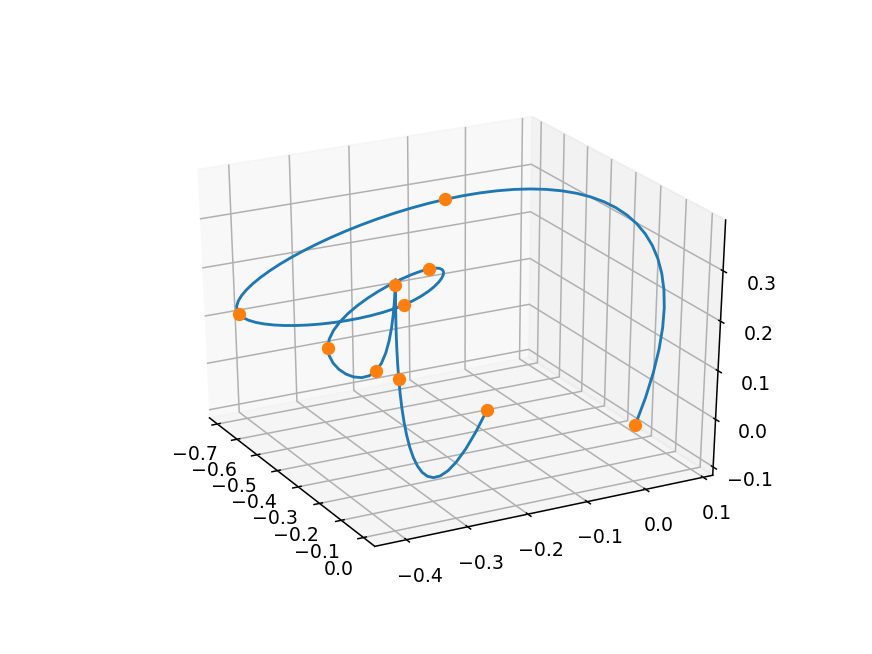

At t=2, {x, y, z] = [0, 0, 0]


In [14]:
#b.(i) 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import UnivariateSpline
%matplotlib notebook


ti = [0.0, 0.6 , 1.1 , 1.5 , 1.8 , 2.1 , 2.3 , 2.5 , 2.8 , 3.2 ]
xi = [0.0,-0.44,-0.69,-0.63,-0.62,-0.55,-0.63,-0.67,-0.44,-0.10]
yi = [0.0,-0.15,-0.41,-0.15,-0.11,-0.31,-0.20,-0.15,-0.23,-0.21]
zi = [0.0, 0.36, 0.11, 0.09, 0.16, 0.06,-0.04, 0.12, 0.01, 0.05]

f = UnivariateSpline(ti,xi,s=0)
g = UnivariateSpline(ti,yi,s=0)
h = UnivariateSpline(ti,zi,s=0)
t = np.linspace(ti[0],ti[-1],129)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(f(t),g(t),h(t))
ax.plot(xi,yi,zi,'o')
plt.show()
print("At t=2, {x, y, z] = [%d, %d, %d]" % (f(2), g(2), h(2)))

arc length 3.0346934965192114
(error) 6.110053979288619e-09


<IPython.core.display.Javascript object>


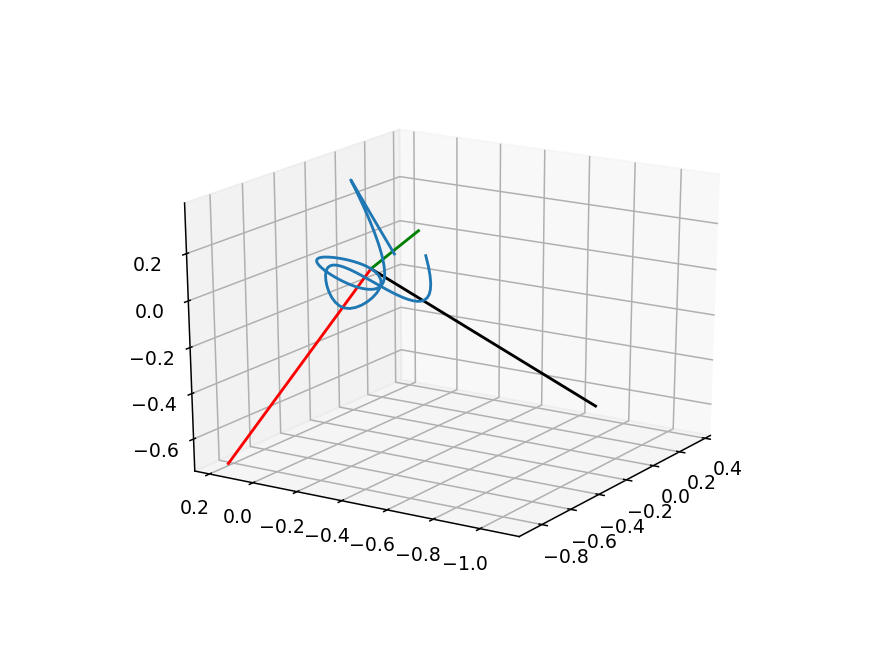

In [15]:
# (ii) tangent, normal, binormal at t=2
# Define functions describing the position, velocity and acceleration vectors
r = lambda t:np.array([f(t),g(t),h(t)]).T
dfdt = f.derivative()
dgdt = g.derivative()
dhdt = h.derivative()

v = lambda t:np.array([dfdt(t),dgdt(t),dhdt(t)]).T
d2fdt2 = dfdt.derivative()
d2gdt2 = dgdt.derivative()
d2hdt2 = dhdt.derivative()

a = lambda t:np.array([d2fdt2(t),d2gdt2(t),d2hdt2(t)]).T

# Set up a function to calculate the 'speed' along the curve, i.e. ||v(t)||
speed = lambda t:np.linalg.norm(v(t),axis=-1)

# Integrate over the speed to get the arc length
from scipy.integrate import quad
arc_length,error = quad(speed,ti[0],ti[-1])
print('arc length',arc_length)
print('(error)',error)

# At a small number of t values, we'll calculate and plot the2
# unit tangent, principal unit normal, and binormal vectors.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rk = r(2)
vk = v(2)
ak = a(2)
Tk = vk/np.linalg.norm(vk)
Nk = ak*np.dot(vk,vk)-vk*np.dot(ak,vk)
Nk /= np.linalg.norm(Nk)
Bk = np.cross(Tk,Nk)

ax.plot([rk[0],rk[0]+Tk[0]],[rk[1],rk[1]+Tk[1]],[rk[2],rk[2]+Tk[2]],'k-') # plot a unit tangent
ax.plot([rk[0],rk[0]+Nk[0]],[rk[1],rk[1]+Nk[1]],[rk[2],rk[2]+Nk[2]],'r-') # plot the principal unit normal
ax.plot([rk[0],rk[0]+Bk[0]],[rk[1],rk[1]+Bk[1]],[rk[2],rk[2]+Bk[2]],'g-') # plot the binormal
ax.plot(f(t),g(t),h(t)) # plot the smooth curve
plt.show()


In [52]:
#c.(i) dblquad
import numpy as np
from scipy.integrate import quad,dblquad,tplquad
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda y,x:np.cos(x)*np.exp(y)
g1 = lambda x:x**2
g2 = lambda x:10+np.sin(x)
dblquad(f,-3,3,g1,g2)

(8906.117634354589, 0.00012463987795092294)

In [56]:
# (ii) tplquad
# converting f(x, y, z) to sphe
f = lambda ph, th, r:4 / (1 + r**2) * (r**2 * np.sin(ph))

tplquad(f,0, 1, 0, 2*np.pi,0,np.pi)

(10.787064853079254, 2.784229322511489e-13)